In [16]:
import numpy as np
import pandas as pd 

import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import RSLPStemmer

nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
language = 'portuguese'

st = RSLPStemmer()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

import string

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('files/patterns.csv', encoding = 'utf-8')
display(data.shape) 

(527, 2)

In [3]:
import sys
del sys.modules["typing_extensions"]

In [4]:
!python -m spacy download pt_core_news_lg
from typing_extensions import Annotated, deprecated, TypeAliasType
import spacy
nlp = spacy.load('pt_core_news_lg')
import pt_core_news_lg
nlp = pt_core_news_lg.load()


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/568.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/568.2 MB 5.3 MB/s eta 0:01:48
     ---------------------------------------- 0.3/568.2 MB 5.2 MB/s eta 0:01:49
     ---------------------------------------- 0.3/568.2 MB 2.6 MB/s eta 0:03:37
     ---------------------------------------- 0.7/568.2 MB 3.9 MB/s eta 0:02:27
     ---------------------------------------- 0.8/568.2 MB 4.0 MB/s eta 0:02:23
     ---------------------------------------- 1.2/568.2 MB 4.4 MB/s eta 0:02:09
     ---------------------------------------- 1.8/568.2 MB 5.8 MB/s eta 0:01:39
     ---------------------------------------- 2.1/568.2 MB 5.8 MB/s eta 0:01:38
     ---------------------------------------- 3.2/568.2 MB 7.9 MB/s eta 0:01:12
     ---------------------------------------- 3.9/568.2 MB 9.1 MB/s eta 0:01:02
     --------------------------------------- 5.2/568.2 MB 10.4 MB/s eta 0:00:55
      -------------------------------------- 7.

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')
language = 'portuguese'

st = RSLPStemmer()

stopwords = stopwords.words(language)
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Luan -
[nltk_data]     Nèscara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ") 
    doc = doc.replace("-", " ")
    doc = doc.replace('"', "")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])    
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [7]:
clean(data['patterns'][0])

'faço agendar consulta técnica presencial'

In [8]:
data['patterns'] = data['patterns'].apply(clean)
data.head()

,patterns,tag
0,faço agendar consulta técnica presencial,Agendamento
1,faço agendar inspeção qualidade após instalação,Agendamento
2,faço agendar visita técnica rotina,Agendamento
3,faço agendar visita técnica urgência meio apli...,Agendamento
4,faço agendar visita técnica urgência mensagem ...,Agendamento


In [9]:
docs = list(data['patterns'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [10]:
X = docs 
y = data['tag']
print(X.shape, y.shape)

(527, 567) (527,)


In [11]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=y.value_counts().index, y=y.value_counts().tolist())])
fig.update_layout(
    title="Values in each Tag",
    xaxis_title="Tag",
    yaxis_title="Values")
fig.show()

In [12]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(421, 567) (421,)
(106, 567) (106,)


In [38]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [20]:
targetNames = ['Informações', 'Delivery', 'Garantia', 'Instalação', 'Agendamento', 'Pagamento', 'Suporte','Localização', 'Despedida', 'Atendimento', 'Preço', 'Produtos', 'Promoção', 'Cumprimento', 'Midias', 'Atendente', 'Telefone', 'Agradecimento']

In [45]:
gnb = GaussianNB() 
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 4 ms

Training Accuracy score: 0.9738717339667459
Testing Accuracy score: 0.7641509433962265


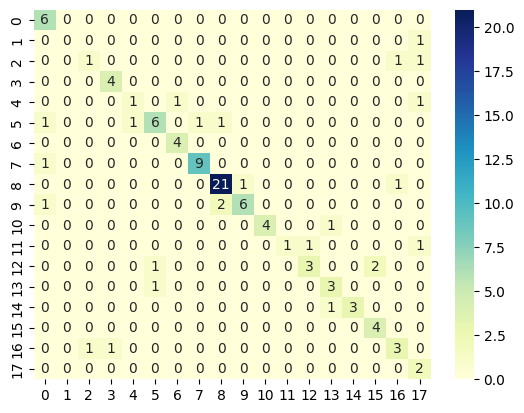

In [46]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [48]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.67      1.00      0.80         6
     Delivery       0.00      0.00      0.00         1
     Garantia       0.50      0.33      0.40         3
   Instalação       0.80      1.00      0.89         4
  Agendamento       0.50      0.33      0.40         3
    Pagamento       0.75      0.60      0.67        10
      Suporte       0.80      1.00      0.89         4
  Localização       0.90      0.90      0.90        10
    Despedida       0.88      0.91      0.89        23
  Atendimento       0.86      0.67      0.75         9
        Preço       1.00      0.80      0.89         5
     Produtos       1.00      0.33      0.50         3
     Promoção       0.75      0.50      0.60         6
  Cumprimento       0.60      0.75      0.67         4
       Midias       1.00      0.75      0.86         4
    Atendente       0.67      1.00      0.80         4
     Telefone       0.60      0.60      0.60         5
Agradecim

In [49]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred_test)
roc_auc_dict

{'Pagamento': 0.7449999999999999,
 'Cumprimento': 0.6618122977346278,
 'Atendimento': 0.9950980392156863,
 'Localização': 0.9,
 'Informações': 0.9384494499738083,
 'Garantia': 0.9447916666666666,
 'Atendente': 0.6618122977346278,
 'Produtos': 0.875,
 'Delivery': 0.7895833333333333,
 'Midias': 0.6666666666666666,
 'Agradecimento': 0.5,
 'Instalação': 0.8281786941580755,
 'Agendamento': 0.985,
 'Promoção': 0.9901960784313725,
 'Suporte': 0.7900990099009901,
 'Preço': 0.8651960784313725,
 'Telefone': 0.9807692307692308,
 'Despedida': 0.9950980392156863}

In [50]:
mnb = MultinomialNB() 
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 2.51 ms

Training Accuracy score: 0.6935866983372921
Testing Accuracy score: 0.5283018867924528


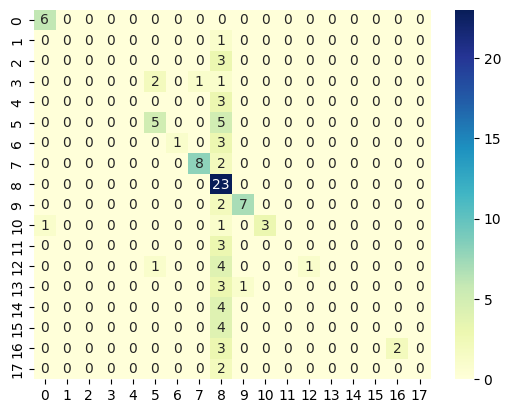

In [51]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [52]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.86      1.00      0.92         6
     Delivery       0.00      0.00      0.00         1
     Garantia       0.00      0.00      0.00         3
   Instalação       0.00      0.00      0.00         4
  Agendamento       0.00      0.00      0.00         3
    Pagamento       0.62      0.50      0.56        10
      Suporte       1.00      0.25      0.40         4
  Localização       0.89      0.80      0.84        10
    Despedida       0.34      1.00      0.51        23
  Atendimento       0.88      0.78      0.82         9
        Preço       1.00      0.60      0.75         5
     Produtos       0.00      0.00      0.00         3
     Promoção       1.00      0.17      0.29         6
  Cumprimento       0.00      0.00      0.00         4
       Midias       0.00      0.00      0.00         4
    Atendente       0.00      0.00      0.00         4
     Telefone       1.00      0.40      0.57         5
Agradecim

In [53]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred_test)
roc_auc_dict

{'Pagamento': 0.5833333333333334,
 'Cumprimento': 0.5,
 'Atendimento': 0.5,
 'Localização': 0.8,
 'Informações': 0.7349397590361446,
 'Garantia': 0.8947916666666667,
 'Atendente': 0.5,
 'Produtos': 0.5,
 'Delivery': 0.734375,
 'Midias': 0.5,
 'Agradecimento': 0.5,
 'Instalação': 0.8837342497136311,
 'Agendamento': 0.995,
 'Promoção': 0.5,
 'Suporte': 0.7,
 'Preço': 0.5,
 'Telefone': 0.5,
 'Despedida': 0.625}

In [54]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 115 ms

Training Accuracy score: 0.8859857482185273
Testing Accuracy score: 0.6509433962264151


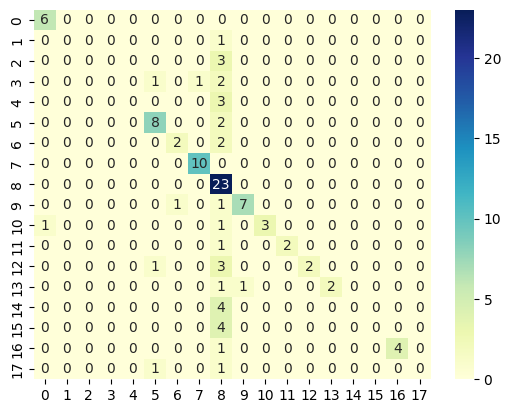

In [55]:
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [56]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.86      1.00      0.92         6
     Delivery       0.00      0.00      0.00         1
     Garantia       0.00      0.00      0.00         3
   Instalação       0.00      0.00      0.00         4
  Agendamento       0.00      0.00      0.00         3
    Pagamento       0.73      0.80      0.76        10
      Suporte       0.67      0.50      0.57         4
  Localização       0.91      1.00      0.95        10
    Despedida       0.43      1.00      0.61        23
  Atendimento       0.88      0.78      0.82         9
        Preço       1.00      0.60      0.75         5
     Produtos       1.00      0.67      0.80         3
     Promoção       1.00      0.33      0.50         6
  Cumprimento       1.00      0.50      0.67         4
       Midias       0.00      0.00      0.00         4
    Atendente       0.00      0.00      0.00         4
     Telefone       1.00      0.80      0.89         5
Agradecim

In [57]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred_test)
roc_auc_dict

{'Pagamento': 0.6666666666666666,
 'Cumprimento': 0.5,
 'Atendimento': 0.5,
 'Localização': 0.8,
 'Informações': 0.8192771084337349,
 'Garantia': 0.9947916666666667,
 'Atendente': 0.5,
 'Produtos': 0.5,
 'Delivery': 0.884375,
 'Midias': 0.8333333333333333,
 'Agradecimento': 0.5,
 'Instalação': 0.8837342497136311,
 'Agendamento': 0.995,
 'Promoção': 0.5,
 'Suporte': 0.9,
 'Preço': 0.75,
 'Telefone': 0.5,
 'Despedida': 0.7450980392156863}

In [58]:
svc =  LinearSVC(class_weight='balanced') 
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 9.52 ms

Training Accuracy score: 0.9904988123515439
Testing Accuracy score: 0.8773584905660378


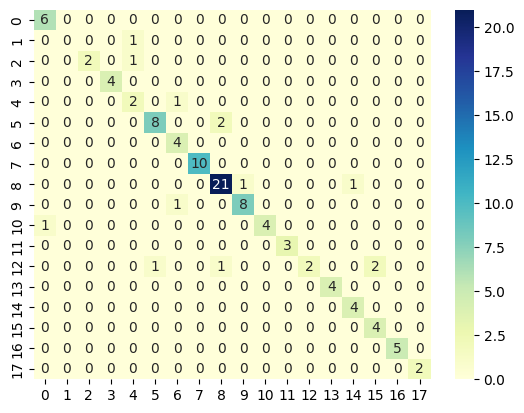

In [59]:
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [60]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.86      1.00      0.92         6
     Delivery       0.00      0.00      0.00         1
     Garantia       1.00      0.67      0.80         3
   Instalação       1.00      1.00      1.00         4
  Agendamento       0.50      0.67      0.57         3
    Pagamento       0.89      0.80      0.84        10
      Suporte       0.67      1.00      0.80         4
  Localização       1.00      1.00      1.00        10
    Despedida       0.88      0.91      0.89        23
  Atendimento       0.89      0.89      0.89         9
        Preço       1.00      0.80      0.89         5
     Produtos       1.00      1.00      1.00         3
     Promoção       1.00      0.33      0.50         6
  Cumprimento       1.00      1.00      1.00         4
       Midias       0.80      1.00      0.89         4
    Atendente       0.67      1.00      0.80         4
     Telefone       1.00      1.00      1.00         5
Agradecim

In [61]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred_test)
roc_auc_dict

{'Pagamento': 0.6666666666666666,
 'Cumprimento': 0.8236245954692556,
 'Atendimento': 1.0,
 'Localização': 0.9,
 'Informações': 0.9384494499738083,
 'Garantia': 1.0,
 'Atendente': 0.8333333333333333,
 'Produtos': 0.9950980392156863,
 'Delivery': 0.8947916666666667,
 'Midias': 1.0,
 'Agradecimento': 0.5,
 'Instalação': 0.9392898052691867,
 'Agendamento': 0.995,
 'Promoção': 0.9901960784313725,
 'Suporte': 1.0,
 'Preço': 1.0,
 'Telefone': 1.0,
 'Despedida': 0.9901960784313725}

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 16 ms

Training Accuracy score: 0.997624703087886
Testing Accuracy score: 0.6132075471698113


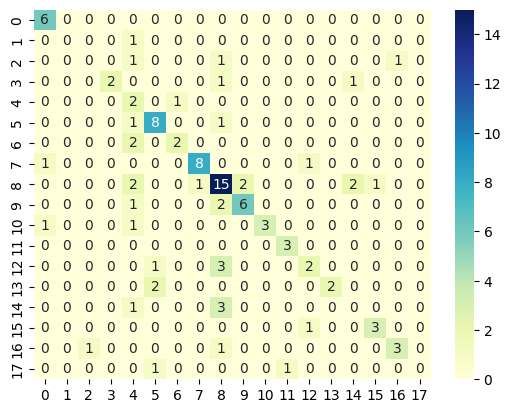

In [63]:
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [64]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.75      1.00      0.86         6
     Delivery       0.00      0.00      0.00         1
     Garantia       0.00      0.00      0.00         3
   Instalação       1.00      0.50      0.67         4
  Agendamento       0.17      0.67      0.27         3
    Pagamento       0.67      0.80      0.73        10
      Suporte       0.67      0.50      0.57         4
  Localização       0.89      0.80      0.84        10
    Despedida       0.56      0.65      0.60        23
  Atendimento       0.75      0.67      0.71         9
        Preço       1.00      0.60      0.75         5
     Produtos       0.75      1.00      0.86         3
     Promoção       0.50      0.33      0.40         6
  Cumprimento       1.00      0.50      0.67         4
       Midias       0.00      0.00      0.00         4
    Atendente       0.75      0.75      0.75         4
     Telefone       0.75      0.60      0.67         5
Agradecim

In [65]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred_test)
roc_auc_dict

{'Pagamento': 0.6566666666666666,
 'Cumprimento': 0.7847896440129449,
 'Atendimento': 0.75,
 'Localização': 0.8,
 'Informações': 0.7537977998952331,
 'Garantia': 0.8947916666666667,
 'Atendente': 0.49514563106796117,
 'Produtos': 0.4852941176470588,
 'Delivery': 0.8791666666666668,
 'Midias': 0.9951456310679612,
 'Agradecimento': 0.5,
 'Instalação': 0.8230240549828177,
 'Agendamento': 0.99,
 'Promoção': 0.8700980392156863,
 'Suporte': 0.7950495049504951,
 'Preço': 0.75,
 'Telefone': 0.5,
 'Despedida': 0.7450980392156863}

In [67]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('LinearSVC', svc)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.995249406175772
Testing Accuracy score: 0.7735849056603774


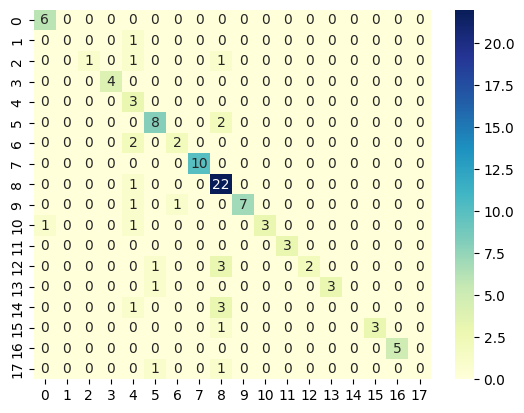

In [68]:
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [69]:
print(classification_report(y_test, y_pred_test, target_names=targetNames))

               precision    recall  f1-score   support

  Informações       0.86      1.00      0.92         6
     Delivery       0.00      0.00      0.00         1
     Garantia       1.00      0.33      0.50         3
   Instalação       1.00      1.00      1.00         4
  Agendamento       0.27      1.00      0.43         3
    Pagamento       0.73      0.80      0.76        10
      Suporte       0.67      0.50      0.57         4
  Localização       1.00      1.00      1.00        10
    Despedida       0.67      0.96      0.79        23
  Atendimento       1.00      0.78      0.88         9
        Preço       1.00      0.60      0.75         5
     Produtos       1.00      1.00      1.00         3
     Promoção       1.00      0.33      0.50         6
  Cumprimento       1.00      0.75      0.86         4
       Midias       0.00      0.00      0.00         4
    Atendente       1.00      0.75      0.86         4
     Telefone       1.00      1.00      1.00         5
Agradecim

In [70]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred_test)
roc_auc_dict

{'Pagamento': 0.6666666666666666,
 'Cumprimento': 0.9611650485436893,
 'Atendimento': 1.0,
 'Localização': 0.8,
 'Informações': 0.9119958093242536,
 'Garantia': 1.0,
 'Atendente': 0.6666666666666666,
 'Produtos': 0.5,
 'Delivery': 0.884375,
 'Midias': 1.0,
 'Agradecimento': 0.5,
 'Instalação': 0.8888888888888888,
 'Agendamento': 0.995,
 'Promoção': 0.875,
 'Suporte': 1.0,
 'Preço': 0.875,
 'Telefone': 0.5,
 'Despedida': 0.7450980392156863}

In [83]:
predictions = vc.predict(X)
predictions = pd.DataFrame(predictions)
predictions.to_csv("files/patternPrediction2.csv",index=False)

In [84]:
import pickle

X_ = data['patterns']
count_vect = CountVectorizer()
count_vect.fit(X_)

pickle.dump(vc, open('model/model2.pkl', 'wb'))
pickle.dump(count_vect, open('model/count_vec2.pkl', 'wb'))
